In [9]:
# Install the required libraries
# !pip install pandas textblob matplotlib

# Download the necessary NLTK corpora for TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\New\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Import the libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [15]:
file_path = 'data_files/Womens Clothing E-Commerce Reviews.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Inti

In [21]:
# Load the dataset from the CSV file
print("Loading reviews from reviews.csv...")
try:
    df = pd.read_csv(file_path)
    
    # We only need the review text column, named 'reviews.text'
    # Let's drop any rows where the review text is missing
    df.dropna(subset=['Review Text'], inplace=True)
    
    # Convert the review column to a list for analysis
    reviews_list = df['Review Text'].tolist()
    
    print(f"Successfully loaded {len(reviews_list)} reviews.")
    
except FileNotFoundError:
    print("Error: 'reviews.csv' not found. Make sure it's in the same folder as your notebook.")
    reviews_list = [] # Create an empty list to avoid errors in the next cells

Loading reviews from reviews.csv...
Successfully loaded 22641 reviews.


In [23]:
# function for data fetching
def analyze_sentiment(reviews):
    print("Analyzing sentiment...")
    sentiment_counts = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
    for review in reviews:
        blob = TextBlob(str(review)) # Use str() for safety
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiment_counts['Positive'] += 1
        elif polarity == 0:
            sentiment_counts['Neutral'] += 1
        else:
            sentiment_counts['Negative'] += 1
    return sentiment_counts

In [25]:
# 
def plot_sentiment(sentiment_counts):
    print("Generating plot...")
    filtered_counts = {k: v for k, v in sentiment_counts.items() if v > 0}
    if not filtered_counts:
        print("No sentiment data to plot.")
        return
    labels = filtered_counts.keys()
    sizes = filtered_counts.values()
    colors = ['#66bb6a', '#ffee58', '#ef5350']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Sentiment Analysis of Amazon Product Reviews', fontsize=16)
    plt.axis('equal')
    plt.show()

Analyzing sentiment...
{'Positive': 21227, 'Neutral': 99, 'Negative': 1315}
Generating plot...


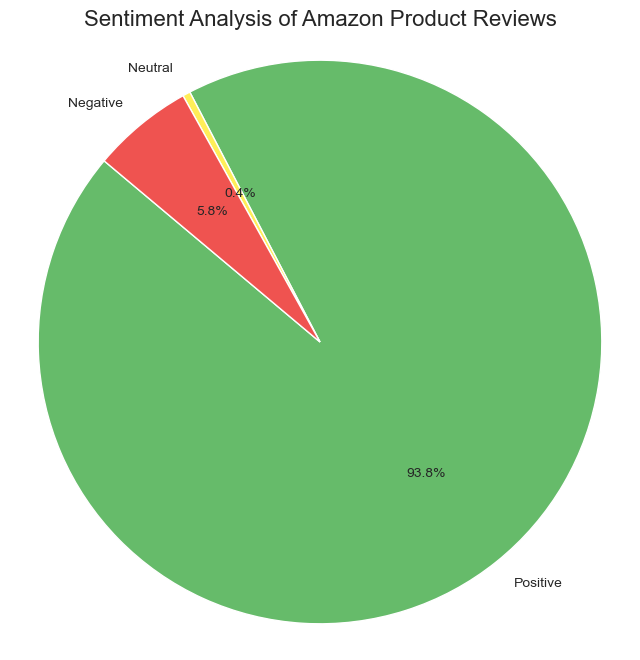

In [27]:
# Check if the reviews list was loaded successfully
if reviews_list:
    # Analyze the sentiment
    sentiment_distribution = analyze_sentiment(reviews_list)
    print(sentiment_distribution)

    # Plot the results
    plot_sentiment(sentiment_distribution)
else:
    print("Analysis aborted because no reviews were loaded.")

***Using a real dataset of women's clothing reviews, sentiment analysis was performed with the TextBlob library. The results showed a predominantly positive sentiment among customers. This project demonstrated the ability to process unstructured text data and quantify customer opinion, a key task in business analytics.***